In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/Users/dysson/Downloads/train.gz',compression='gzip')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


In [11]:
df_train.rename(columns = {'C1': 'search_engine_type', 'C14': 'product_type', 'C15': 'advertiser_type'}, inplace = True)

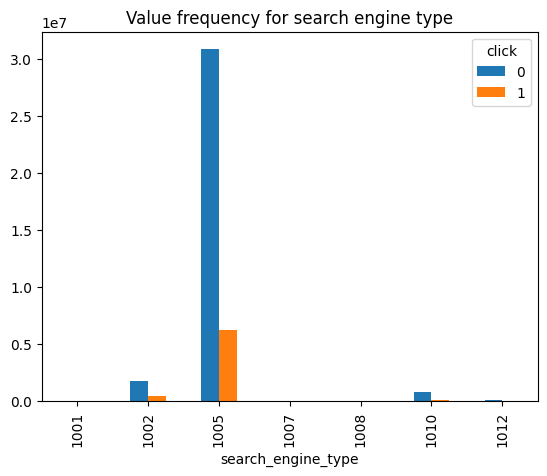

In [12]:
# Construct bar chart for clicks by search engine type
se_df = df_train.groupby(['search_engine_type', 'click']).size().unstack()
se_df.plot(kind = 'bar', title = 'Value frequency for search engine type')
plt.show()

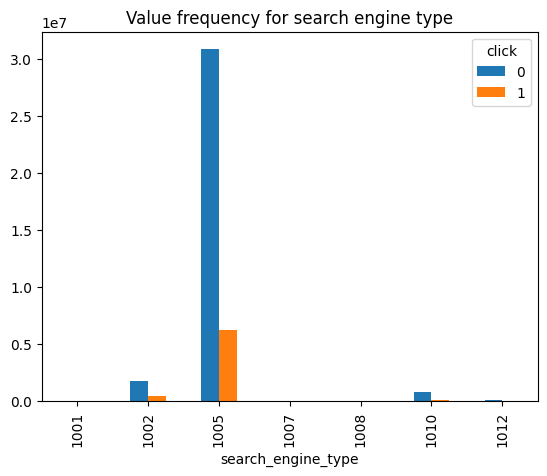

click  search_engine_type   clicks     total       CTR
0                    1001      316      9463  0.033393
1                    1002   467995   2220812  0.210731
2                    1005  6289056  37140632  0.169331
3                    1007     1392     35304  0.039429
4                    1008      704      5787  0.121652
5                    1010    86023    903457  0.095215
6                    1012    19580    113512  0.172493


In [13]:
# Construct bar chart for clicks by search engine type
se_df = df_train.groupby(['search_engine_type', 'click']).size().unstack()
se_df.plot(kind = 'bar', title = 'Value frequency for search engine type')
plt.show()

# Reset index and rename columns
se_df = se_df.reset_index()
se_df.rename(columns = {0: 'non_clicks', 1: 'clicks'}, inplace = True)

# Compute CTR using clicks and non clicks
se_df['total'] = se_df['clicks'] + se_df['non_clicks']
se_df['CTR'] = se_df['clicks'] / se_df['total']

# Print CTR by search engine type
print(se_df[['search_engine_type', 'clicks', 'total', 'CTR']])

In [15]:
# Change the hour column to a datetime and extract hour of day
df_train['hour'] = pd.to_datetime(df_train['hour'], format = '%y%m%d%H')
df_train['hour_of_day'] = df_train['hour'].dt.hour
print(df_train.head(5))

             id  click       hour  search_engine_type  banner_pos   site_id  \
0  1.000009e+18      0 2014-10-21                1005           0  1fbe01fe   
1  1.000017e+19      0 2014-10-21                1005           0  1fbe01fe   
2  1.000037e+19      0 2014-10-21                1005           0  1fbe01fe   
3  1.000064e+19      0 2014-10-21                1005           0  1fbe01fe   
4  1.000068e+19      0 2014-10-21                1005           1  fe8cc448   

  site_domain site_category    app_id app_domain  ... device_conn_type  \
0    f3845767      28905ebd  ecad2386   7801e8d9  ...                2   
1    f3845767      28905ebd  ecad2386   7801e8d9  ...                0   
2    f3845767      28905ebd  ecad2386   7801e8d9  ...                0   
3    f3845767      28905ebd  ecad2386   7801e8d9  ...                0   
4    9166c161      0569f928  ecad2386   7801e8d9  ...                0   

  product_type advertiser_type C16   C17  C18  C19     C20  C21  hour_of_day  
0

             id  click       hour  search_engine_type  banner_pos   site_id  \
0  1.000009e+18      0 2014-10-21                1005           0  1fbe01fe   
1  1.000017e+19      0 2014-10-21                1005           0  1fbe01fe   
2  1.000037e+19      0 2014-10-21                1005           0  1fbe01fe   
3  1.000064e+19      0 2014-10-21                1005           0  1fbe01fe   
4  1.000068e+19      0 2014-10-21                1005           1  fe8cc448   

  site_domain site_category    app_id app_domain  ... device_conn_type  \
0    f3845767      28905ebd  ecad2386   7801e8d9  ...                2   
1    f3845767      28905ebd  ecad2386   7801e8d9  ...                0   
2    f3845767      28905ebd  ecad2386   7801e8d9  ...                0   
3    f3845767      28905ebd  ecad2386   7801e8d9  ...                0   
4    9166c161      0569f928  ecad2386   7801e8d9  ...                0   

  product_type advertiser_type C16   C17  C18  C19     C20  C21  hour_of_day  
0

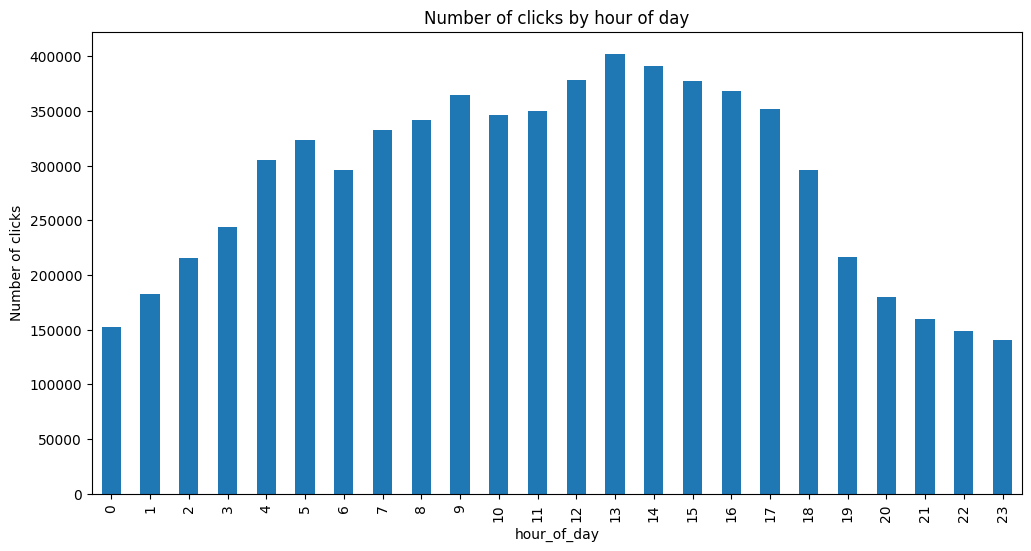

In [ ]:
# Get and plot total clicks by hour of day
df_train.groupby('hour_of_day')['click'].sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour of day')
plt.show()

In [ ]:
# Get categorical columns
categorical_cols = df_train.select_dtypes(
  include = ['object']).columns.tolist()
print("Categorical columns: ")
print(categorical_cols)

# Iterate over categorical columns and apply hash function
for col in categorical_cols:
	df_train[col] = df_train[col].apply(lambda x: hash(x))

# Print examples of new output
print(df_train.head(5))

Categorical columns: 
['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']
             id  click       hour  search_engine_type  banner_pos  \
0  1.000009e+18      0 2014-10-21                1005           0   
1  1.000017e+19      0 2014-10-21                1005           0   
2  1.000037e+19      0 2014-10-21                1005           0   
3  1.000064e+19      0 2014-10-21                1005           0   
4  1.000068e+19      0 2014-10-21                1005           1   

               site_id          site_domain        site_category  \
0 -1772887955816450199  4617496986076109286 -4496954759555260008   
1 -1772887955816450199  4617496986076109286 -4496954759555260008   
2 -1772887955816450199  4617496986076109286 -4496954759555260008   
3 -1772887955816450199  4617496986076109286 -4496954759555260008   
4  4601527744000909844  6300663804082890638  8538421239888050812   

                app_id      

In [25]:
# Get counts of total and unique values for given features
feature_list = ["search_engine_type", "product_type", "advertiser_type"]
for feature in feature_list:
	print(f"\n {feature}: ")
	print("count = ", df_train[feature].count())
	print("nunique = ", df_train[feature].nunique())


 search_engine_type: 
count =  40428967
nunique =  7

 product_type: 
count =  40428967
nunique =  2626

 advertiser_type: 
count =  40428967
nunique =  8


In [27]:
# Define new features as counts
new_feature_list = ['device_id', 'site_id'] + feature_list
for new_feature in new_feature_list:
  df_train[new_feature + '_count'] = df_train.groupby(
    new_feature)['click'].transform("count")
print(df_train.head(5))

             id  click       hour  search_engine_type  banner_pos  \
0  1.000009e+18      0 2014-10-21                1005           0   
1  1.000017e+19      0 2014-10-21                1005           0   
2  1.000037e+19      0 2014-10-21                1005           0   
3  1.000064e+19      0 2014-10-21                1005           0   
4  1.000068e+19      0 2014-10-21                1005           1   

               site_id          site_domain        site_category  \
0 -1772887955816450199  4617496986076109286 -4496954759555260008   
1 -1772887955816450199  4617496986076109286 -4496954759555260008   
2 -1772887955816450199  4617496986076109286 -4496954759555260008   
3 -1772887955816450199  4617496986076109286 -4496954759555260008   
4  4601527744000909844  6300663804082890638  8538421239888050812   

                app_id           app_domain  ...  C18  C19     C20  C21  \
0 -2715749953214354541 -6250206272013835461  ...    0   35      -1   79   
1 -2715749953214354541 -62